In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Manav Kumar\.cache\kagglehub\datasets\omkargurav\face-mask-dataset\versions\1


In [2]:
!pip install kagglehub

In [3]:
#Importing Dependencies
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [4]:
with_mask_files = os.listdir("dataset\data\with_mask")
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1.jpg', 'with_mask_10.jpg', 'with_mask_100.jpg', 'with_mask_1000.jpg', 'with_mask_1001.jpg']
['with_mask_995.jpg', 'with_mask_996.jpg', 'with_mask_997.jpg', 'with_mask_998.jpg', 'with_mask_999.jpg']


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Manav Kumar\AppData\Local\Temp\ipykernel_17664\714707357.py:1: SyntaxWarning: invalid escape sequence '\d'
  with_mask_files = os.listdir("dataset\data\with_mask")


In [5]:
without_mask_files = os.listdir("dataset\data\without_mask")
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1.jpg', 'without_mask_10.jpg', 'without_mask_100.jpg', 'without_mask_1000.jpg', 'without_mask_1001.jpg']
['without_mask_995.jpg', 'without_mask_996.jpg', 'without_mask_997.jpg', 'without_mask_998.jpg', 'without_mask_999.jpg']


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Manav Kumar\AppData\Local\Temp\ipykernel_17664\249699967.py:1: SyntaxWarning: invalid escape sequence '\d'
  without_mask_files = os.listdir("dataset\data\without_mask")


In [6]:
#creating labels 
with_mask_labels = [1]* len(with_mask_files)
without_mask_labels = [0]* len(without_mask_files)

In [7]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])


[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [8]:

print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [9]:
#combining both labels
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(with_mask_labels[0:5]) #first 5 rows
print(without_mask_labels[-5:]) #last 5 rows

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**displaying the images**

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Manav Kumar\AppData\Local\Temp\ipykernel_17664\1071937746.py:2: SyntaxWarning: invalid escape sequence '\d'
  image = mpimg.imread("dataset\data\with_mask/with_mask_100.jpg")


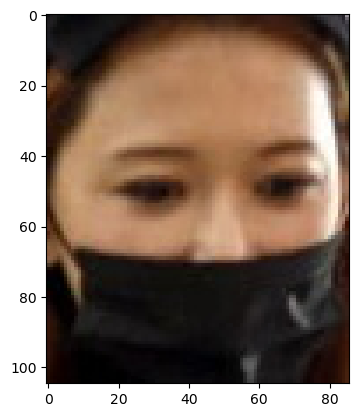

In [10]:
#displaying with mask image
image = mpimg.imread("dataset\data\with_mask/with_mask_100.jpg")
imgplot= plt.imshow(image)
plt.show()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Manav Kumar\AppData\Local\Temp\ipykernel_17664\3422936483.py:2: SyntaxWarning: invalid escape sequence '\d'
  image = mpimg.imread("dataset\data\without_mask/without_mask_100.jpg")


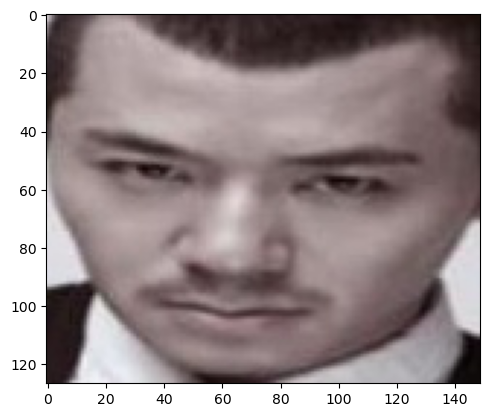

In [11]:
#displaying without mask image
image = mpimg.imread("dataset\data\without_mask/without_mask_100.jpg")
imgplot= plt.imshow(image)
plt.show()

**Image Preprocessing**

1. Resize the images
2. Convert the images into numpy array

In [12]:
#Convert the with mask images to numpy array
data_path = "dataset\data\with_mask/" # "/" --> should add this because we have to add the img_file(i) variable after with_mask

data=[]
for img_file in with_mask_files:
    image = Image.open(data_path + img_file)
    image = image.resize((128,128))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)


#Convert the without mask images to numpy array
without_mask_path = "dataset\data\without_mask/" # "/" --> should add this because we have to add the img_file(i) variable after with_mask


for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128,128))
    image = image.convert("RGB")
    image = np.array(image)
    data.append(image)



<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:14: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Manav Kumar\AppData\Local\Temp\ipykernel_17664\3240833470.py:2: SyntaxWarning: invalid escape sequence '\d'
  data_path = "dataset\data\with_mask/" # "/" --> should add this because we have to add the img_file(i) variable after with_mask
C:\Users\Manav Kumar\AppData\Local\Temp\ipykernel_17664\3240833470.py:14: SyntaxWarning: invalid escape sequence '\d'
  without_mask_path = "dataset\data\without_mask/" # "/" --> should add this because we have to add the img_file(i) variable after with_mask
c:\Users\Manav Kumar\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
print(len(data))
print(type(data))

7553
<class 'list'>


In [14]:
#printing the value of data 0
print(data[0])


[[[50 58 31]
  [46 54 34]
  [56 59 42]
  ...
  [26 32 25]
  [29 33 18]
  [34 40 16]]

 [[47 55 30]
  [49 57 37]
  [59 63 40]
  ...
  [18 21 11]
  [38 42 31]
  [31 41 22]]

 [[52 58 37]
  [50 59 38]
  [59 64 36]
  ...
  [45 44 30]
  [29 35 28]
  [20 30 17]]

 ...

 [[63 72 37]
  [66 76 41]
  [74 84 50]
  ...
  [ 5  4  0]
  [20 19 15]
  [17 17 12]]

 [[59 71 34]
  [60 70 39]
  [68 76 50]
  ...
  [16 15 12]
  [15 13 10]
  [13  9  7]]

 [[53 69 29]
  [54 64 37]
  [57 63 43]
  ...
  [18 18 16]
  [16 13 12]
  [20 12 13]]]


In [15]:
print(data[0].shape)
print(type(data[0]))

(128, 128, 3)
<class 'numpy.ndarray'>


In [16]:
#converting image list and label list to numpy array 
X = np.array(data)
Y = np.array(labels) 

In [17]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [18]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [19]:
print(X)
print(Y)

[[[[ 50  58  31]
   [ 46  54  34]
   [ 56  59  42]
   ...
   [ 26  32  25]
   [ 29  33  18]
   [ 34  40  16]]

  [[ 47  55  30]
   [ 49  57  37]
   [ 59  63  40]
   ...
   [ 18  21  11]
   [ 38  42  31]
   [ 31  41  22]]

  [[ 52  58  37]
   [ 50  59  38]
   [ 59  64  36]
   ...
   [ 45  44  30]
   [ 29  35  28]
   [ 20  30  17]]

  ...

  [[ 63  72  37]
   [ 66  76  41]
   [ 74  84  50]
   ...
   [  5   4   0]
   [ 20  19  15]
   [ 17  17  12]]

  [[ 59  71  34]
   [ 60  70  39]
   [ 68  76  50]
   ...
   [ 16  15  12]
   [ 15  13  10]
   [ 13   9   7]]

  [[ 53  69  29]
   [ 54  64  37]
   [ 57  63  43]
   ...
   [ 18  18  16]
   [ 16  13  12]
   [ 20  12  13]]]


 [[[115  61  15]
   [121  65  18]
   [129  73  26]
   ...
   [ 87  53  25]
   [ 87  53  28]
   [ 88  53  31]]

  [[135  78  31]
   [136  80  33]
   [132  75  29]
   ...
   [ 78  44  17]
   [ 74  40  15]
   [ 78  43  21]]

  [[124  68  21]
   [125  68  22]
   [115  59  13]
   ...
   [ 77  43  16]
   [ 79  45  20]
   [ 78  43

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [21]:
print(X.shape,x_train.shape,x_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [22]:
print(x_train[0])

[[[225 235 198]
  [210 216 186]
  [189 188 169]
  ...
  [187 182 165]
  [181 174 151]
  [165 182 133]]

 [[224 228 217]
  [202 204 195]
  [201 199 193]
  ...
  [198 190 180]
  [177 169 154]
  [158 182 141]]

 [[205 204 214]
  [221 219 227]
  [195 191 197]
  ...
  [183 173 174]
  [174 165 160]
  [174 203 166]]

 ...

 [[155 176 199]
  [160 180 197]
  [165 185 195]
  ...
  [ 88  99  71]
  [106 113  85]
  [ 99 104  63]]

 [[150 177 197]
  [168 190 208]
  [174 192 209]
  ...
  [106 113  81]
  [ 99 103  67]
  [ 99  99  33]]

 [[160 193 210]
  [177 198 221]
  [175 189 214]
  ...
  [103 107  70]
  [ 77  81  47]
  [ 99  94  63]]]


In [23]:
#scaling the values
x_train_scaled = x_train/255
x_test_scaled = x_test/255


In [24]:
print(x_train_scaled[0])

[[[0.88235294 0.92156863 0.77647059]
  [0.82352941 0.84705882 0.72941176]
  [0.74117647 0.7372549  0.6627451 ]
  ...
  [0.73333333 0.71372549 0.64705882]
  [0.70980392 0.68235294 0.59215686]
  [0.64705882 0.71372549 0.52156863]]

 [[0.87843137 0.89411765 0.85098039]
  [0.79215686 0.8        0.76470588]
  [0.78823529 0.78039216 0.75686275]
  ...
  [0.77647059 0.74509804 0.70588235]
  [0.69411765 0.6627451  0.60392157]
  [0.61960784 0.71372549 0.55294118]]

 [[0.80392157 0.8        0.83921569]
  [0.86666667 0.85882353 0.89019608]
  [0.76470588 0.74901961 0.77254902]
  ...
  [0.71764706 0.67843137 0.68235294]
  [0.68235294 0.64705882 0.62745098]
  [0.68235294 0.79607843 0.65098039]]

 ...

 [[0.60784314 0.69019608 0.78039216]
  [0.62745098 0.70588235 0.77254902]
  [0.64705882 0.7254902  0.76470588]
  ...
  [0.34509804 0.38823529 0.27843137]
  [0.41568627 0.44313725 0.33333333]
  [0.38823529 0.40784314 0.24705882]]

 [[0.58823529 0.69411765 0.77254902]
  [0.65882353 0.74509804 0.81568627]


**Building the Convolutional Neural Network (CNN)**

In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
number_of_classes = 2


model = keras.Sequential()

#adding convolutional layer
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(128,128,3)))
#adding poolingmax layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


#adding convolutional layer
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"))
#adding poolingmax layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#adding Flatten layer
model.add(keras.layers.Flatten())

#adding Dense layers
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.5))

#adding Dense layers
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dropout(0.5))

#adding Output layers with sigmoid function
model.add(keras.layers.Dense(number_of_classes,activation="sigmoid"))


c:\Users\Manav Kumar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
#Compiling the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

In [28]:
#Training the Neural Network on Training data
history = model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 31s 166ms/step - acc: 0.7134 - loss: 0.6627 - val_acc: 0.8595 - val_loss: 0.3416
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 168ms/step - acc: 0.8854 - loss: 0.3025 - val_acc: 0.8645 - val_loss: 0.3356
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 28s 164ms/step - acc: 0.9036 - loss: 0.2495 - val_acc: 0.9289 - val_loss: 0.2082
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 28s 166ms/step - acc: 0.9191 - loss: 0.1952 - val_acc: 0.9223 - val_loss: 0.2161
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 29s 168ms/step - acc: 0.9401 - loss: 0.1611 - val_acc: 0.9322 - val_loss: 0.2071


**Evaluating the model on testing data**

In [29]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
print("The Test accuracy is",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - acc: 0.9252 - loss: 0.1815
The Test accuracy is 0.9324950575828552


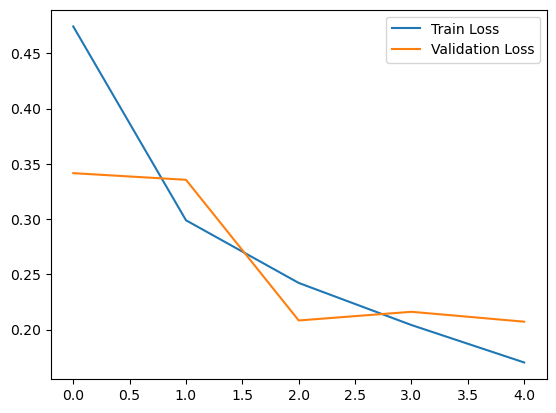

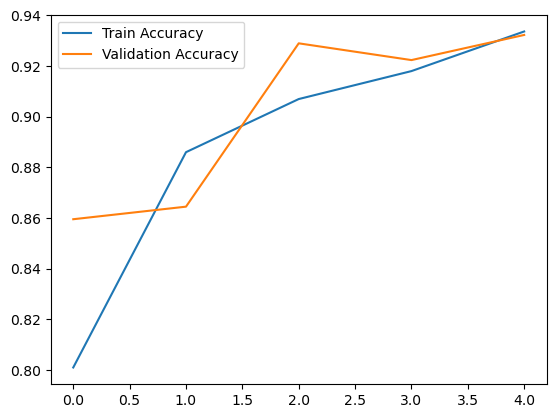

In [30]:
#Visualizing the Evaluation

h=history

#plot the loss value
plt.plot(h.history["loss"], label="Train Loss")
plt.plot(h.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history["acc"], label="Train Accuracy")
plt.plot(h.history["val_acc"], label="Validation Accuracy")
plt.legend()
plt.show()

**creating a Predictive system**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
0
The person in the image is Without a Mask


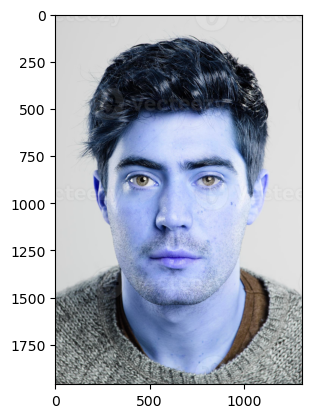

In [31]:
input_img_path = input("Enter a path of the Image:")

#reading the image
input_image = cv2.imread(input_img_path)

#displaying the image
# cv2.imshow("Input image",input_image)
plt.imshow(input_image)

#resizing the image
input_image_resized = cv2.resize(input_image,(128,128))

#scaling the image
input_image_scaled = input_image_resized/255

#reshaping the image for predicting only one image
input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

#prediction
input_prediction = model.predict(input_image_reshaped)

#converting prediction into labels
input_pred_labels = np.argmax(input_prediction )
print(input_pred_labels)

if input_pred_labels == 1:
    print("The person in the image is Wearing a Mask")
else:
    print("The person in the image is Without a Mask")
